## House Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding 
- Data cleaning 
- Data exploration
- Data preparation
- Model building and evaluation


### 1. Data Understanding 

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1021]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [1022]:
# reading the dataset
house = pd.read_csv("train.csv")
house.shape

(1460, 81)

In [1023]:
# summary of the dataset: 1461 rows, 81 columns with null values
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 2. Data Cleaning

#### Missing Values Treatment

In [1024]:
# Checking for column-wise null percentages which is greater than 0
round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False)[round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False) > 0] 

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [1025]:
#Since Pool Quality is a categorical column, Replace NA with None, i.e., Where there are no pools there is no quality
house.loc[pd.isnull(house['PoolQC']), ['PoolQC']] = 'None'

#Since Misc Feature is a categorical column, Replace NA with None, i.e., There is no special feature
house.loc[pd.isnull(house['MiscFeature']), ['MiscFeature']] = 'None'

#Since Alley is a categorical column, Replace NA with None, i.e., There is no alley space
house.loc[pd.isnull(house['Alley']), ['Alley']] = 'None'

#Since Fence is a categorical column, Replace NA with None, i.e., There is no Fence 
house.loc[pd.isnull(house['Fence']), ['Fence']] = 'None'

#Since FireplaceQu is a categorical column, Replace NA with None, i.e., There is no Fireplace 
house.loc[pd.isnull(house['FireplaceQu']), ['FireplaceQu']] = 'None'

#Since GarageCond is a categorical column, Replace NA with None, i.e., There is no Garage 
house.loc[pd.isnull(house['GarageCond']), ['GarageCond']] = 'None'

#Since GarageType is a categorical column, Replace NA with None, i.e., There is no Garage 
house.loc[pd.isnull(house['GarageType']), ['GarageType']] = 'None'

#Since GarageFinish is a categorical column, Replace NA with None, i.e., There is no Garage 
house.loc[pd.isnull(house['GarageFinish']), ['GarageFinish']] = 'None'

#Since GarageQual is a categorical column, Replace NA with None, i.e., There is no Garage 
house.loc[pd.isnull(house['GarageQual']), ['GarageQual']] = 'None'

#Since BsmtExposure is a categorical column, Replace NA with None, i.e., There is no Basement 
house.loc[pd.isnull(house['BsmtExposure']), ['BsmtExposure']] = 'None'

#Since BsmtFinType2 is a categorical column, Replace NA with None, i.e., There is no Basement 
house.loc[pd.isnull(house['BsmtFinType2']), ['BsmtFinType2']] = 'None'

#Since BsmtFinType1 is a categorical column, Replace NA with None, i.e., There is no Basement
house.loc[pd.isnull(house['BsmtFinType1']), ['BsmtFinType1']] = 'None'

#Since BsmtCond is a categorical column, Replace NA with None, i.e., There is no Basement
house.loc[pd.isnull(house['BsmtCond']), ['BsmtCond']] = 'None'

#Since BsmtQual is a categorical column, Replace NA with None, i.e., There is no Basement
house.loc[pd.isnull(house['BsmtQual']), ['BsmtQual']] = 'None'

#Since MasVnrType is a categorical column, Replace NA with None, i.e., There is no Mason's Veneering  
house.loc[pd.isnull(house['MasVnrType']), ['MasVnrType']] = 'None'

#Since MasVnrType is a categorical column, Replace NA with SBrkr, since that is the most used type  
house.loc[pd.isnull(house['Electrical']), ['Electrical']] = 'SBrkr'

In [1026]:
#After looking at the range of the data, Impute the null value
house.loc[pd.isnull(house['LotFrontage']), ['LotFrontage']] = house['LotFrontage'].describe()['mean'] 

#Substitute the value by Year Sold so that the net value of Yrs since Garage built comes out to be zero since there is no garage 
house.loc[pd.isnull(house['GarageYrBlt']), ['GarageYrBlt']] = house[house['GarageYrBlt'].isnull()]['YrSold'] 

# Masonry veneer area is imputed as zero as 50% that's the case 
house.loc[pd.isnull(house['MasVnrArea']), ['MasVnrArea']] = 0  

In [1027]:
round(house.isnull().sum()/len(house.index)*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

#### Understanding the Data Dictionary and Retaining proper data type

Convert the columns to categorical columns based on the Data Dictionary

In [1028]:
house['MSSubClass']    =   house['MSSubClass'].astype('category')
house['MSZoning']      =   house['MSZoning'].astype('category')
house['Street']        =   house['Street'].astype('category')
house['Alley']         =   house['Alley'].astype('category')
house['LotShape']      =   house['LotShape'].astype('category')
house['LandContour']   =   house['LandContour'].astype('category')
house['Utilities']     =   house['Utilities'].astype('category')
house['LotConfig']     =   house['LotConfig'].astype('category')
house['Alley']         =   house['Alley'].astype('category')
house['LandSlope']     =   house['LandSlope'].astype('category')
house['Neighborhood']  =   house['Neighborhood'].astype('category')
house['Condition1']    =   house['Condition1'].astype('category')
house['Condition2']    =   house['Condition2'].astype('category')
house['BldgType']      =   house['BldgType'].astype('category')
house['HouseStyle']    =   house['HouseStyle'].astype('category')
house['OverallQual']   =   house['OverallQual'].astype('category')
house['OverallCond']   =   house['OverallCond'].astype('category')
house['RoofStyle']     =   house['RoofStyle'].astype('category')
house['RoofMatl']      =   house['RoofMatl'].astype('category')
house['Exterior1st']   =   house['Exterior1st'].astype('category')
house['Exterior2nd']   =   house['Exterior2nd'].astype('category')
house['MasVnrType']    =   house['MasVnrType'].astype('category')
house['ExterQual']     =   house['ExterQual'].astype('category')
house['ExterCond']     =   house['ExterCond'].astype('category')
house['Foundation']    =   house['Foundation'].astype('category')
house['BsmtQual']      =   house['BsmtQual'].astype('category')
house['BsmtCond']      =   house['BsmtCond'].astype('category')
house['BsmtExposure']  =   house['BsmtExposure'].astype('category')
house['BsmtFinType1']  =   house['BsmtFinType1'].astype('category')
house['BsmtFinType2']  =   house['BsmtFinType2'].astype('category')
house['Heating']       =   house['Heating'].astype('category')
house['HeatingQC']     =   house['HeatingQC'].astype('category')
house['CentralAir']    =   house['CentralAir'].astype('category')
house['Electrical']    =   house['Electrical'].astype('category')
house['KitchenQual']   =   house['KitchenQual'].astype('category')
house['Functional']    =   house['Functional'].astype('category')
house['Electrical']    =   house['Electrical'].astype('category')
house['FireplaceQu']   =   house['FireplaceQu'].astype('category')
house['GarageType']    =   house['GarageType'].astype('category')
house['GarageFinish']  =   house['GarageFinish'].astype('category')
house['GarageQual']    =   house['GarageQual'].astype('category')
house['GarageCond']    =   house['GarageCond'].astype('category')
house['PavedDrive']    =   house['PavedDrive'].astype('category')
house['PoolQC']        =   house['PoolQC'].astype('category')
house['Fence']         =   house['Fence'].astype('category')
house['MiscFeature']   =   house['MiscFeature'].astype('category')
house['SaleType']      =   house['SaleType'].astype('category')
house['SaleCondition'] =   house['SaleCondition'].astype('category')


In [1029]:
house[list(house.select_dtypes(include=['category']).columns)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
Street           1460 non-null category
Alley            1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null category
MasVnrType       1460 non-null category
ExterQual        1460 non-null category
ExterCond    

In [1030]:
house[list(house.select_dtypes(exclude=['category']).columns)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
Id               1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null float64
GarageCars       1460 non-null int64

#### Outlier Treatment 

In [1031]:
for col in list(house.select_dtypes(exclude=['category']).columns):
    Q1 = house[col].quantile(0.25)
    Q3 = house[col].quantile(0.75)
    IQR = Q3 - Q1
    house= house[(house[col] >= Q1 - 1.5*IQR) & (house[col] <= Q3 + 1.5*IQR)]

#### Calculating Year Variables

In [1032]:
import datetime
now = datetime.datetime.now()

#Calculate the Current Year - DO NOT HARDCODE YEAR VALUES
print(now.year, "is the current year") 
yyyy = int(now.year)
house[['YearBuilt']] = yyyy - house[['YearBuilt']]
house[['YearRemodAdd']] = yyyy - house[['YearRemodAdd']]
house[['GarageYrBlt']]  = yyyy - house[['GarageYrBlt']]
house[['YrSold']] = yyyy - house[['YrSold']]

2019 is the current year


In [1033]:
house.loc[:,['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].head(2)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,16,16,16.0,11
2,18,17,18.0,11


### 3. Data Exploration

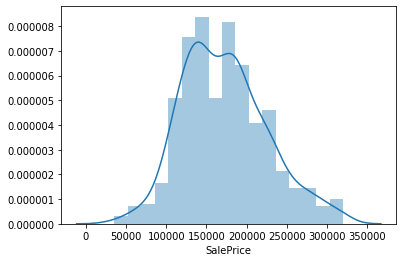

In [1034]:
#Analyse the target variable whether it is normally distributed or not
sns.distplot(house['SalePrice'])
plt.show()


It is seen that the target variable is normally distributed, thus Regression is carried out

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


In [1035]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(exclude=['category'])
house_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,16,16,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,11,208500
2,3,68.0,11250,18,17,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,11,223500
4,5,84.0,14260,19,19,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,11,250000
6,7,75.0,10084,15,14,186.0,1369,0,317,1686,...,255,57,0,0,0,0,0,8,12,307000
10,11,70.0,11200,54,54,0.0,906,0,134,1040,...,0,0,0,0,0,0,0,2,11,129500


Lets omit the `Id` variable as anyways it will not have any co-relation

In [1036]:
# dropping symboling and car_ID 
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,16,16,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,11,208500
2,68.0,11250,18,17,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,11,223500
4,84.0,14260,19,19,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,11,250000
6,75.0,10084,15,14,186.0,1369,0,317,1686,1694,...,255,57,0,0,0,0,0,8,12,307000
10,70.0,11200,54,54,0.0,906,0,134,1040,1040,...,0,0,0,0,0,0,0,2,11,129500


In [1037]:
# correlation matrix
cor = house_numeric.corr()
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.558537,-0.115336,-0.036061,0.238956,0.042947,NaN,0.080731,0.170960,0.184683,...,0.052532,0.034846,NaN,NaN,NaN,NaN,NaN,0.025690,-0.005661,0.290170
LotArea,0.558537,1.000000,-0.063373,0.033856,0.149202,0.089027,NaN,0.039172,0.173153,0.170904,...,0.034973,0.032458,NaN,NaN,NaN,NaN,NaN,-0.017673,-0.010163,0.291622
YearBuilt,-0.115336,-0.063373,1.000000,0.736313,-0.238084,-0.058929,NaN,-0.218769,-0.387279,-0.282936,...,-0.264787,-0.276022,NaN,NaN,NaN,NaN,NaN,0.015732,-0.026240,-0.681635
YearRemodAdd,-0.036061,0.033856,0.736313,1.000000,-0.125897,0.027709,NaN,-0.225760,-0.282558,-0.229322,...,-0.232031,-0.314101,NaN,NaN,NaN,NaN,NaN,0.016985,0.007817,-0.599732
MasVnrArea,0.238956,0.149202,-0.238084,-0.125897,1.000000,0.179627,NaN,0.055253,0.315737,0.339810,...,0.230376,0.095787,NaN,NaN,NaN,NaN,NaN,0.059853,-0.011412,0.387673
BsmtFinSF1,0.042947,0.089027,-0.058929,0.027709,0.179627,1.000000,NaN,-0.734895,0.283718,0.259357,...,0.188210,-0.005689,NaN,NaN,NaN,NaN,NaN,-0.020581,-0.087055,0.170210
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,0.080731,0.039172,-0.218769,-0.225760,0.055253,-0.734895,NaN,1.000000,0.441810,0.394484,...,-0.003485,0.132898,NaN,NaN,NaN,NaN,NaN,0.086980,0.084201,0.220487
TotalBsmtSF,0.170960,0.173153,-0.387279,-0.282558,0.315737,0.283718,NaN,0.441810,1.000000,0.900858,...,0.244041,0.180384,NaN,NaN,NaN,NaN,NaN,0.095760,0.003897,0.536911
1stFlrSF,0.184683,0.170904,-0.282936,-0.229322,0.339810,0.259357,NaN,0.394484,0.900858,1.000000,...,0.229230,0.146933,NaN,NaN,NaN,NaN,NaN,0.090914,0.023864,0.489576


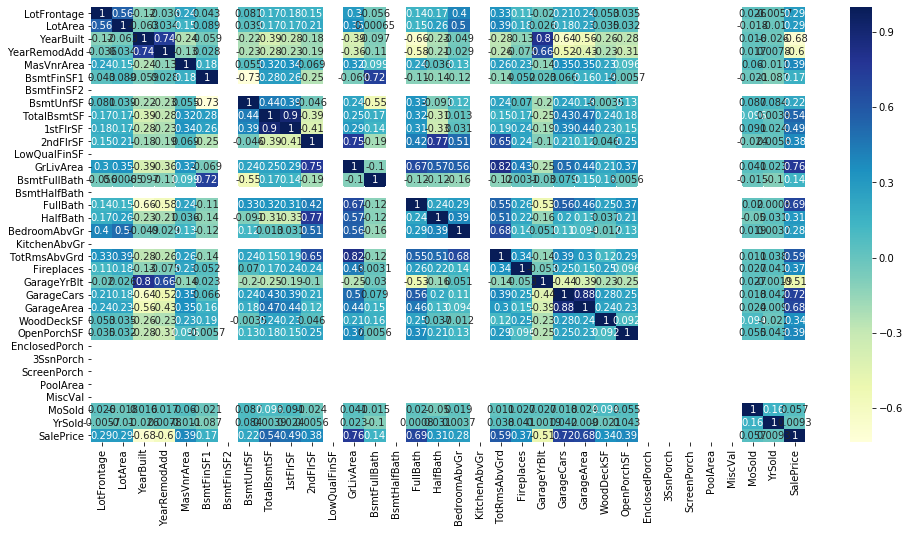

In [1038]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of sales price with independent variables:
- Sales Price is highly (positively) correlated with ```Living Area per square feet, Garage Cars, Garage Area, Total square feet of basement area and First Floor square feet```.

- Price is negatively correlated to ```Year Built``` and ```Year Remodeled ``` meaning that old houses have lesser sales value.

Correlation among independent variables:
- Many independent variables are highly correlated: Garage Cars and Garage Area, Living Area and Fireplaces, Total square feet of basement area and First Floor square feet.


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

### 4. Data Preparation 

Let's now prepare the data and build the model

Let's create the dummy variable

In [1039]:
cols_having_none =  ['Alley', 'MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
       'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']

In [1040]:
category_cols =  list(house.select_dtypes(include=['category']).columns)

In [1041]:
cols_drop_first = list(set(category_cols) - set(cols_having_none))

In [1042]:
#Convert into dummies for variables that doesn't have 'None' values
house_dummies = pd.get_dummies(house[cols_drop_first], drop_first=True)
X = house.drop(house[cols_drop_first], axis=1)

In [1043]:
#Convert into dummies for variables that have 'None' values
house_dummies2 = pd.get_dummies(house[cols_having_none])
house_dummies2 = house_dummies2.drop(list(filter(lambda x: 1 if 'None' in x else 0,house_dummies2.columns)), axis=1)
Y = X.drop(house[cols_having_none], axis=1)

In [1044]:
Y

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.000000,8450,16,16,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,11,208500
2,3,68.000000,11250,18,17,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,11,223500
4,5,84.000000,14260,19,19,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,11,250000
6,7,75.000000,10084,15,14,186.0,1369,0,317,1686,...,255,57,0,0,0,0,0,8,12,307000
10,11,70.000000,11200,54,54,0.0,906,0,134,1040,...,0,0,0,0,0,0,0,2,11,129500
13,14,91.000000,10652,13,12,306.0,0,0,1494,1494,...,160,33,0,0,0,0,0,8,12,279500
15,16,51.000000,6120,90,18,0.0,0,0,832,832,...,48,112,0,0,0,0,0,7,12,132000
18,19,66.000000,13695,15,15,0.0,646,0,468,1114,...,0,102,0,0,0,0,0,6,11,159000
19,20,70.000000,7560,61,54,0.0,504,0,525,1029,...,0,0,0,0,0,0,0,5,10,139000
23,24,44.000000,4224,43,43,0.0,840,0,200,1040,...,100,110,0,0,0,0,0,6,12,129900


In [1045]:
house_d = pd.concat([house_dummies,Y,house_dummies2], axis=1)
house_d.shape

(584, 289)

In [1046]:
# split into X and y
X = house_d[list((set(house_d.columns) - {'SalePrice'}))]
y = house_d['SalePrice']


In [1047]:
y.shape

(584,)

In [1048]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Exterior2nd_Brk Cmn', 'OverallQual_8', 'Exterior2nd_BrkFace',
       'Exterior1st_BrkComm', 'MSSubClass_160', 'HeatingQC_Gd',
       'LotConfig_CulDSac', 'SaleType_New', 'HeatingQC_Fa', 'Fence_GdWo',
       ...
       'BsmtFinType1_BLQ', 'HouseStyle_1Story', 'RoofMatl_CompShg',
       'RoofStyle_Gable', 'HalfBath', 'KitchenQual_Gd', 'Exterior2nd_MetalSd',
       'LandContour_HLS', 'Condition2_PosA', 'Condition1_Feedr'],
      dtype='object', length=288)

In [1049]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

### RFE
Recursive feature elimination

In [1050]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [1051]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("Initial Training R2 Score", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(X_test)
print("Initial Testing R2 Score",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

rfe = RFE(lm, 80)             # running RFE
rfe = rfe.fit(X_train, y_train)

Initial Training R2 Score 0.9739316228756555
Initial Testing R2 Score 0.7430097584079018


In [1052]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Exterior2nd_Brk Cmn', False, 99),
 ('OverallQual_8', False, 37),
 ('Exterior2nd_BrkFace', False, 26),
 ('Exterior1st_BrkComm', True, 1),
 ('MSSubClass_160', False, 40),
 ('HeatingQC_Gd', False, 131),
 ('LotConfig_CulDSac', False, 143),
 ('SaleType_New', False, 85),
 ('HeatingQC_Fa', False, 121),
 ('Fence_GdWo', False, 174),
 ('Neighborhood_Blueste', True, 1),
 ('Functional_Mod', True, 1),
 ('LotFrontage', False, 133),
 ('Exterior2nd_ImStucc', True, 1),
 ('FullBath', False, 117),
 ('LandContour_Lvl', False, 109),
 ('Exterior2nd_Stucco', False, 13),
 ('2ndFlrSF', True, 1),
 ('SaleCondition_Partial', False, 49),
 ('GarageArea', False, 12),
 ('Neighborhood_BrDale', False, 4),
 ('Exterior2nd_Wd Shng', False, 27),
 ('MiscFeature_Gar2', True, 1),
 ('OverallCond_6', True, 1),
 ('GarageType_Detchd', True, 1),
 ('GarageType_BuiltIn', True, 1),
 ('SaleCondition_Family', False, 122),
 ('OverallQual_10', True, 1),
 ('RoofMatl_Roll', True, 1),
 ('MSSubClass_50', False, 132),
 ('LotShape_IR2', Fal

In [1053]:
col = X_train.columns[rfe.support_]


## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [1054]:
# list of alphas to tune
params = {'alpha': [0.01, 0.1, 1, 5, 10,50,100,500,1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col], np.log(y_train)) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1055]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004198,0.000400,0.001998,2.415452e-06,0.01,{'alpha': 0.01},-0.106008,-0.106103,-0.104002,-0.096257,...,-0.103530,0.003697,7,-0.085436,-0.079176,-0.079901,-0.084970,-0.082437,-0.082384,0.002548
1,0.004398,0.000490,0.001599,4.895512e-04,0.1,{'alpha': 0.1},-0.105995,-0.106096,-0.104011,-0.096248,...,-0.103518,0.003695,6,-0.085432,-0.079175,-0.079900,-0.084966,-0.082440,-0.082383,0.002547
2,0.004598,0.002331,0.001998,6.311293e-04,1,{'alpha': 1},-0.105865,-0.106029,-0.104101,-0.096150,...,-0.103397,0.003676,5,-0.085394,-0.079156,-0.079885,-0.084928,-0.082469,-0.082367,0.002538
3,0.003598,0.001854,0.001200,3.982083e-04,5,{'alpha': 5},-0.105272,-0.105739,-0.104479,-0.095809,...,-0.102915,0.003640,4,-0.085235,-0.079075,-0.079841,-0.084792,-0.082595,-0.082308,0.002504
4,0.002999,0.000632,0.000999,7.294206e-07,10,{'alpha': 10},-0.104526,-0.105396,-0.104861,-0.095382,...,-0.102368,0.003720,3,-0.085056,-0.079007,-0.079819,-0.084675,-0.082774,-0.082266,0.002468


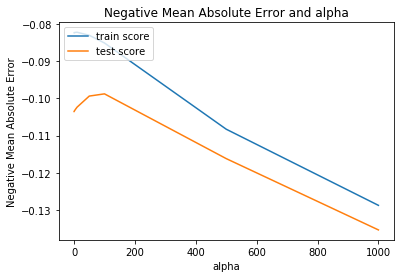

In [1056]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1057]:
alpha = 130
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[col], np.log(y_train))
print("Ridge Coefficients", ridge.coef_)

lm = Ridge(alpha=130)
lm.fit(X_train[col], y_train)

# predict
y_train_pred = lm.predict(X_train[col])
print("R2 Score on Training Set after Ridge Regression", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test[col])
print("R2 Score on Test Set after Ridge Regression",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


Ridge Coefficients [-8.85088381e-03  0.00000000e+00 -8.85088381e-03 -1.29447333e-31
  4.95420824e-02  0.00000000e+00 -7.95190805e-03 -6.50597626e-03
  1.04517595e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.31211484e-02 -3.61331741e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.21944096e-02  0.00000000e+00 -6.32216234e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.54771233e-03 -2.15284452e-03  2.76918587e-02  0.00000000e+00
  0.00000000e+00 -3.54213154e-02  3.11938614e-03  0.00000000e+00
  1.55317702e-02  0.00000000e+00 -1.38569302e-04 -1.81988070e-03
  0.00000000e+00  1.81007216e-02  2.67617296e-02  1.14775209e-02
  9.93851661e-04  2.65115593e-02  9.93851661e-04  5.90140732e-04
  7.87311162e-02 -8.98753853e-03 -5.90140732e-04 -1.25030394e-02
 -8.25240134e-03  2.14346544e-02 -2.37332731e-02  1.05830342e-02
  3.67091297e-02  4.07513581e-03 -1.13185033e-02 -8.84857603e-03
  4.90973111e-02 -1.59799138e-02  9.50601146e-03  3.92985553e-03
 -1.56

Ideal Value of lambda - hyperparameter is found to be ```130``` for Ridge Regression. Also note the increase in R2 score. 

## Lasso

In [1058]:
lasso = Lasso()

#params = {'alpha':[1,0.1, 0.01 ,0.005, 0.002, 0.001,0.0001,0.00001 ]}

params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.001]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], np.log(y_train)) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1059]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033381,0.006148,0.001600,4.898821e-04,0.0001,{'alpha': 0.0001},-0.105720,-0.105757,-0.105138,-0.096064,...,-0.103505,0.003722,6,-0.085455,-0.079185,-0.079872,-0.084988,-0.082446,-0.082389,0.002560
1,0.027583,0.004961,0.001200,3.995895e-04,0.0002,{'alpha': 0.0002},-0.105535,-0.105719,-0.105311,-0.095787,...,-0.103346,0.003794,5,-0.085453,-0.079184,-0.079845,-0.084986,-0.082472,-0.082388,0.002565
2,0.016590,0.001624,0.001200,4.002572e-04,0.0003,{'alpha': 0.0003},-0.105352,-0.105769,-0.105465,-0.095515,...,-0.103207,0.003885,4,-0.085460,-0.079195,-0.079816,-0.084993,-0.082497,-0.082392,0.002571
3,0.014195,0.002032,0.001392,4.885779e-04,0.0004,{'alpha': 0.0004},-0.105165,-0.105760,-0.105629,-0.095243,...,-0.103057,0.003979,3,-0.085469,-0.079210,-0.079790,-0.085005,-0.082548,-0.082404,0.002577
4,0.011789,0.000752,0.001000,7.294206e-07,0.0005,{'alpha': 0.0005},-0.104977,-0.105749,-0.105766,-0.094970,...,-0.102900,0.004078,2,-0.085477,-0.079230,-0.079763,-0.085030,-0.082600,-0.082420,0.002586


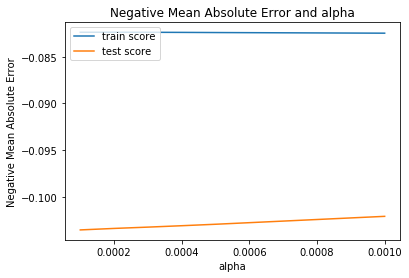

In [1060]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1061]:
alpha =0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train[col], np.log(y_train)) 
print("Lasso Coefficients",lasso.coef_)

lm = Lasso(alpha=0.0002)
lm.fit(X_train[col], y_train)

# predict and calculate accuracy
y_train_pred = lm.predict(X_train[col])
print("R2 Score on Training Set after Lasso Regression", metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test[col])
print("R2 Score on Test Set after Lasso Regression",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


Lasso Coefficients [-0.01692995  0.         -0.         -0.          0.03234276  0.
 -0.00270554 -0.00096303  0.          0.          0.          0.
 -0.0235411  -0.07787567  0.          0.          0.          0.01310976
  0.         -0.00440346  0.          0.          0.          0.
 -0.          0.00287872  0.04230625  0.          0.         -0.04683635
  0.          0.          0.00925033  0.          0.00486719 -0.00214863
  0.          0.0557224   0.0199452   0.          0.00418009  0.
  0.0013569  -0.          0.12947393 -0.00424367  0.00052026 -0.0231821
 -0.0103005   0.0174222  -0.04418068  0.02162118 -0.          0.00956818
 -0.01382131 -0.          0.09003378 -0.01751907 -0.         -0.
  0.         -0.          0.00249435  0.01483718  0.02826028 -0.01763332
  0.02030176 -0.00060755  0.02310335  0.          0.00387298  0.0015998
 -0.01309079  0.          0.00839046  0.          0.00028103  0.0023847
  0.         -0.        ]
R2 Score on Training Set after Lasso Regression 0

Ideal Value of lambda - regularisation hyperparameter is found to be ```0.0002``` for Lasso Regression. Also note the increase in R2 score 

In [1062]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
col = list(set(col) - {'constant'})
cols = X[col].columns
cols = cols.insert(0, "constant")

In [1063]:
list(zip(cols, model_parameters))

[('constant', 173199.963),
 ('Exterior2nd_AsphShn', -3094.282),
 ('Exterior1st_BrkComm', 0.0),
 ('SaleType_ConLw', -0.0),
 ('Neighborhood_Blueste', 0.0),
 ('BsmtQual_Ex', 26414.269),
 ('Functional_Mod', 0.0),
 ('BsmtCond_Po', -3096.784),
 ('FireplaceQu_Po', -12965.578),
 ('Exterior2nd_ImStucc', -8540.7),
 ('OverallCond_9', 0.0),
 ('MSSubClass_45', 0.0),
 ('2ndFlrSF', 0.0),
 ('TotalBsmtSF', -16972.131),
 ('MiscFeature_Gar2', -13785.411),
 ('OverallCond_6', 0.0),
 ('BsmtQual_Gd', 0.0),
 ('GarageType_Detchd', 0.0),
 ('GarageType_BuiltIn', 16233.674),
 ('OverallQual_10', 0.0),
 ('RoofMatl_Roll', 774.886),
 ('BsmtFinType1_LwQ', 0.0),
 ('HouseStyle_2.5Fin', 0.0),
 ('GarageFinish_Unf', 0.0),
 ('HouseStyle_1.5Unf', 0.0),
 ('Condition2_Norm', 673.36),
 ('BsmtQual_TA', -3968.58),
 ('GrLivArea', 4901.563),
 ('GarageFinish_RFn', 0.0),
 ('BsmtUnfSF', 0.0),
 ('BsmtCond_TA', -4103.048),
 ('BsmtFinType1_ALQ', 9261.205),
 ('Electrical_Mix', 0.0),
 ('BsmtFinType1_Rec', 2350.419),
 ('ExterCond_Po', 0.0),

In [1064]:
cols = list(set(cols) - {'constant'})
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train[cols], y_train)
list(zip(X_train[cols].columns,rfe.support_,rfe.ranking_))

[('Exterior2nd_AsphShn', False, 71),
 ('Exterior1st_BrkComm', False, 13),
 ('SaleType_ConLw', False, 11),
 ('Neighborhood_Blueste', False, 56),
 ('BsmtQual_Ex', True, 1),
 ('Functional_Mod', False, 51),
 ('BsmtCond_Po', False, 10),
 ('FireplaceQu_Po', False, 47),
 ('Exterior2nd_ImStucc', False, 55),
 ('OverallCond_9', False, 25),
 ('MSSubClass_45', False, 6),
 ('2ndFlrSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('MiscFeature_Gar2', False, 68),
 ('OverallCond_6', False, 4),
 ('BsmtQual_Gd', True, 1),
 ('GarageType_Detchd', False, 41),
 ('GarageType_BuiltIn', False, 40),
 ('OverallQual_10', False, 65),
 ('RoofMatl_Roll', False, 69),
 ('BsmtFinType1_LwQ', False, 7),
 ('HouseStyle_2.5Fin', False, 57),
 ('GarageFinish_Unf', True, 1),
 ('HouseStyle_1.5Unf', False, 5),
 ('BsmtQual_TA', False, 22),
 ('Condition2_Norm', False, 44),
 ('GrLivArea', True, 1),
 ('GarageFinish_RFn', False, 33),
 ('BsmtUnfSF', True, 1),
 ('BsmtCond_TA', False, 35),
 ('BsmtFinType1_ALQ', False, 18),
 ('Electrical_Mix',

In [ ]:
cols = X_train[cols].columns[rfe.support_]
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

The aforementioned parameters are the important variables in house sales Prediction